<a href="https://colab.research.google.com/github/truongfaith/oscon-workshop/blob/master/Algotrading_Datasources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import json
import requests

start = datetime(2018, 1, 1)
end = datetime(2019, 4, 30)

# Federal Reserve Economic Data (FRED)

The most comprehensive respository for US economic time series data. It has more than half a million economic times series from 87 sources. It covers banking, business/fiscal, consumer price indexes, employment and population, exchange rates, gross domestic product, interest rates, monetary aggregates, producer price indexes, reserves and monetary base, U.S. trade and international transactions, and U.S. financial data. The time series are compiled by the Federal Reserve and many are collected from government agencies such as the U.S. Census and the Bureau of Labor Statistics. 

See all the time series here: https://fred.stlouisfed.org/

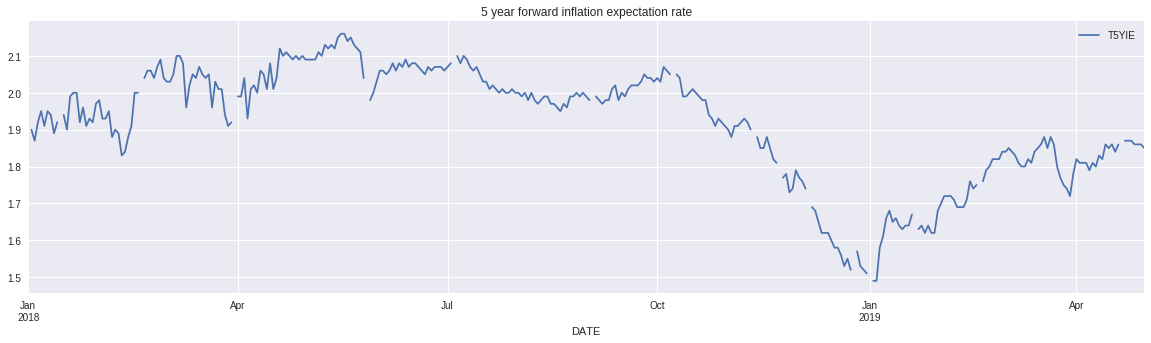

In [0]:
inflation = pdr.DataReader('T5YIE', 'fred', start, end)
inflation.plot(figsize=(20,5), title='5 year forward inflation expectation rate'), plt.show();

# Alpha Vantage
Repository of free APIs for realtime (upto 1 minute) and historical data (upto 20 years). Suggested usage is 5 API requests per minute and 500 requests per day with your own API key. APIs are grouped into four categories: 1. Equity 2. Currencies (including cryptocurrencies) 3. Sectors and 4. Technical indicators. Run by a tight-knit community of researchers, engineers, and business professionals. Website supports CSV and JSON formats.

You can find the API documentation here: https://www.alphavantage.co/documentation/

In [0]:
response = requests.get("https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=USD&apikey=demo")
alphadict = json.loads(response.text)
eur = pd.DataFrame(alphadict['Time Series FX (Daily)']).T
eur.index = pd.to_datetime(eur.index)
eur = eur.sort_index(ascending = True)
eur.columns = ['open', 'high', 'low', 'close']
eur = eur.astype(float)
eur.head()

,open,high,low,close
2019-03-05,1.1335,1.1339,1.1288,1.1299
2019-03-06,1.1299,1.1325,1.1284,1.1308
2019-03-07,1.1308,1.1320,1.1175,1.1191
2019-03-08,1.1191,1.1246,1.1184,1.1235
2019-03-10,1.1238,1.1244,1.1229,1.1234


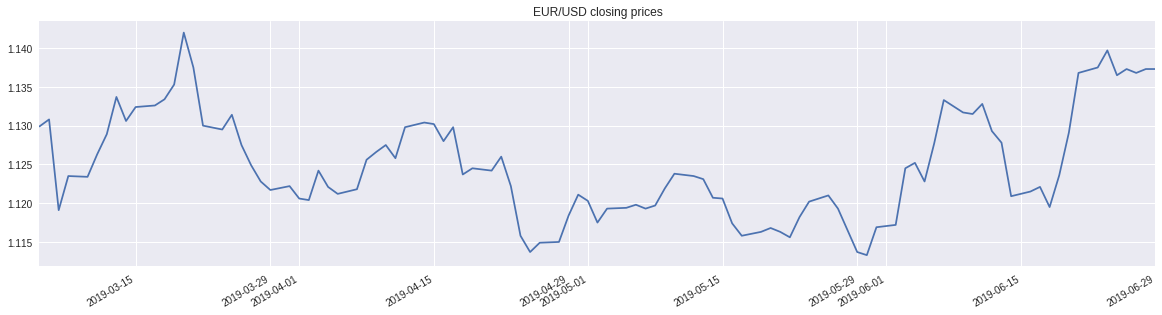

In [0]:
eur['close'].plot(figsize=(20,5), title='EUR/USD closing prices'), plt.show();

# Yahoo Finance
This is the grand daddy of free financial information. It has a vast repository of historical data that cover most traded securities. There is a pandas datareader that requires a bug fix which is provided below. However, the API is not reliable and will not return data sometimes.

In [0]:
import fix_yahoo_finance as yf
yf.pdr_override()
stock = pdr.get_data_yahoo('AMZN', start, end)
stock.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1172.000000,1190.000000,1170.510010,1189.010010,1189.010010,2694500
2018-01-03,1188.300049,1205.489990,1188.300049,1204.199951,1204.199951,3108800
2018-01-04,1205.000000,1215.869995,1204.660034,1209.589966,1209.589966,3022100
2018-01-05,1217.510010,1229.140015,1210.000000,1229.140015,1229.140015,3544700
2018-01-08,1236.000000,1253.079956,1232.030029,1246.869995,1246.869995,4279500


# Quandl
A one stop shop for economic, financial and sentiment data some of it is offered for free and most others for a fee. Quandl sources data from over half a million publishers worldwide. It was  acquired by NASDAQ in 2018. It sources freely available public sources like FRED and private sources of alternative data. Many freely available data, such as historical equity data, are offered for a fee. Anonymous users have a limit of 20 calls per 10 minutes and 50 calls per day.
Authenticated users have a limit of 300 calls per 10 seconds, 2,000 calls per 10 minutes and a limit of 50,000 calls per day. Authenticated users of free data feeds have a concurrency limit of one; that is, they can make one call at a time and have an additional call in the queue. 

See API documentation here: https://docs.quandl.com/

In [0]:
!pip install quandl

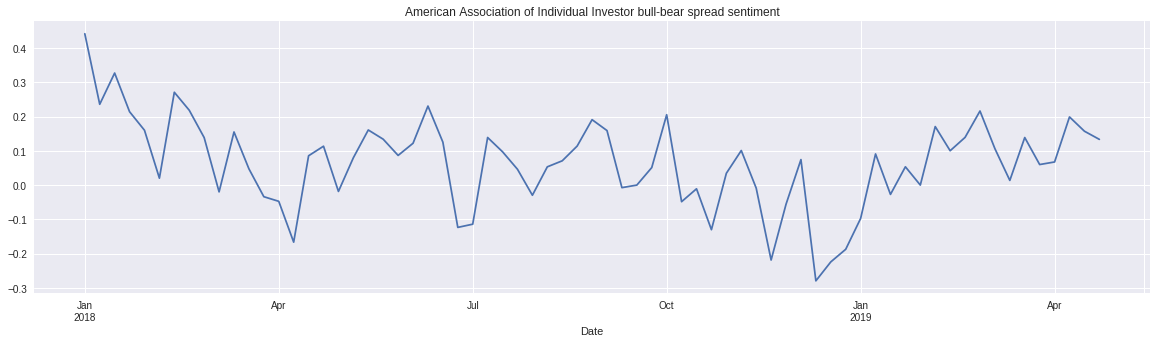

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,,,,,,
2018-01-04,0.597531,0.246914,0.155556,1.000001,0.431950,0.441975,0.382182,0.483619,0.280746,2714.37,2673.61,2713.06
2018-01-11,0.486726,0.262537,0.250737,1.000000,0.456106,0.235989,0.382203,0.483613,0.280794,2759.14,2697.77,2748.23
2018-01-18,0.541133,0.244973,0.213894,1.000000,0.479381,0.327239,0.382198,0.483577,0.280819,2807.54,2736.06,2802.56
2018-01-25,0.454545,0.305195,0.240260,1.000000,0.491267,0.214285,0.382163,0.483521,0.280805,2852.97,2778.38,2837.54
2018-02-01,0.447712,0.264706,0.287582,1.000000,0.501135,0.160130,0.382157,0.483485,0.280830,2872.87,2813.04,2823.81


In [0]:
import quandl
investor_sentiment = quandl.get('AAII/AAII_SENTIMENT', start_date= start, end_date= end)
investor_sentiment['Bull-Bear Spread'].plot(figsize=(20,5), title='American Association of Individual Investor bull-bear spread sentiment'), plt.show();
investor_sentiment.head()

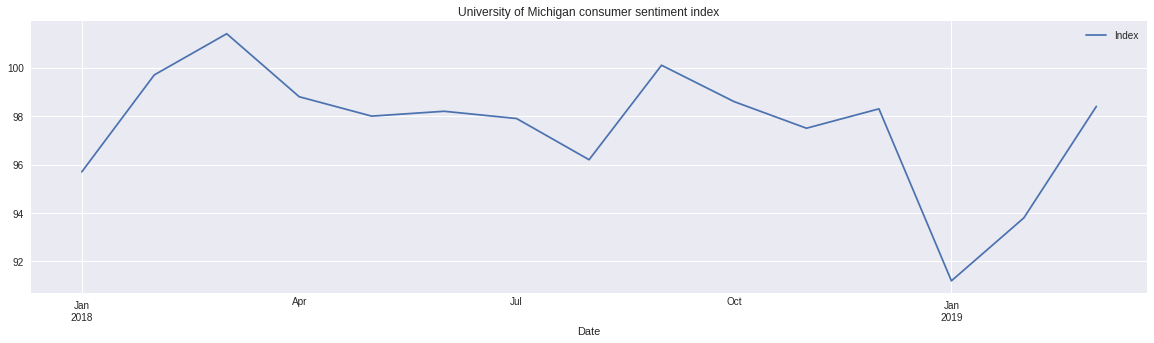

In [0]:
consumer_sentiment = quandl.get('UMICH/SOC1', start_date= start, end_date= end)
consumer_sentiment.plot(figsize=(20,5), title='University of Michigan consumer sentiment index'), plt.show();

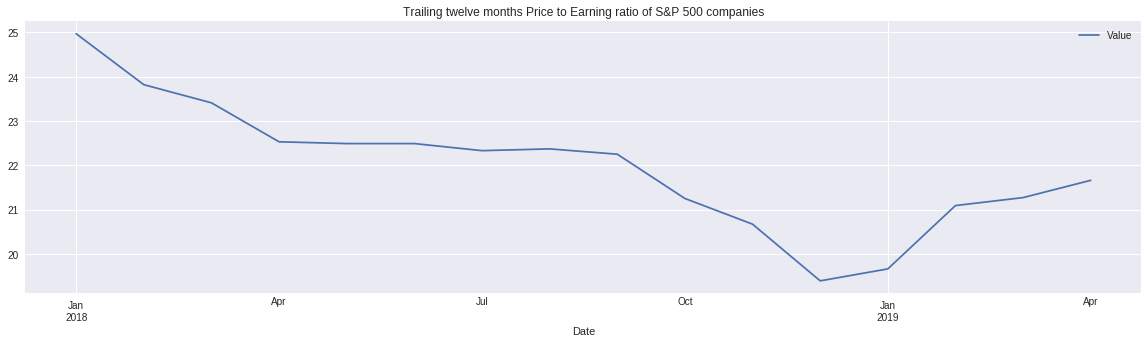

In [0]:
spx = quandl.get('MULTPL/SP500_PE_RATIO_MONTH', start_date = start, end_date = end)
spx.plot(figsize=(20,5), title='Trailing twelve months Price to Earning ratio of S&P 500 companies'), plt.show();


# IEX Cloud
The Investors Exchange (IEX) was founded by Brad Katsuyama, hero of the book 'Flash Boys' by Michael Lewis. IEX recently launced IEX Cloud, a new platform provides market and fundamental data for free and for a fee. The default data format is JSON. See code snippets below.

For more information about the APIs, see: https://iexcloud.io/docs/api/#introduction

In [0]:
response = requests.get("https://sandbox.iexapis.com/stable/stock/aapl/financials?token=Tpk_53e30ef0593440d5855c259602cad185")
jdictionary = json.loads(response.text)
financials = pd.DataFrame(jdictionary['financials'])
financials

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,longTermDebt,netIncome,operatingExpense,operatingIncome,operatingRevenue,reportDate,researchAndDevelopment,shareholderEquity,shortTermDebt,totalAssets,totalCash,totalDebt,totalLiabilities,totalRevenue
0,-5047029213,11501055394,36553055102,126088352463,39475873442,23423859873,22198196450,93101117537,11665496261,45572121154,13742852131,60045177941,2019-04-13,4016962055,109138168459,23072545625,345445400156,82314229849,115414757785,240741472449,59476514059


In [0]:
!pip install edgar

# Electronic Data Gathering, Analysis, and Retrieval system (EDGAR)
Comprehensive repository about companies, both domestic and foreign, who are required by law to file several forms like 10K and 10Q. Third-party filings with respect to these companies, such as tender offers and Schedule 13D filings, are also filed via EDGAR. Not all SEC filings by public companies are available on EDGAR. Companies were phased in to EDGAR filing over a three-year period, ending 6 May 1996. Information is copious and needs to be parsed. 

For more information go here: https://www.sec.gov/edgar/searchedgar/accessing-edgar-data.htm

In [0]:
import edgar
company = edgar.Company("Oracle Corp", "0001341439")
tree = company.getAllFilings(filingType = "10-K")
docs = edgar.getDocuments(tree, noOfDocuments=1)
print(docs)



10-K
1
d568983d10k.htm
10-K


10-K

 
Table of Contents

Index to Financial Statements

  
  UNITED STATES 
SECURITIES AND EXCHANGE COMMISSION 
Washington, D.C. 20549   
  FORM 10-K 
 












☒
 
 ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF
THE SECURITIES EXCHANGE ACT OF 1934
 

 For the fiscal year ended May 31, 2018 
OR   












☐
 
 TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF
THE SECURITIES EXCHANGE ACT OF 1934
 

 For the transition period from              to
               Commission File Number: 001-35992 
   
Oracle Corporation  (Exact name of
registrant as specified in its charter)   










Delaware
 
54-2185193

 (State or other jurisdiction of
incorporation or organization)
 
 (I.R.S. Employer
Identification No.)




500 Oracle Parkway
 


Redwood City, California
 
94065

(Address of principal executive offices)
 
(Zip Code)
 (650) 506-7000 
(Registrants telephone number, including area code) 
Securities registered pursuant to Section 12(b) of